<a href="https://colab.research.google.com/github/thisishasan/slda/blob/main/SL%26DA_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
# Load dataset
data = pd.read_csv("car_price_assignment.csv")

In [5]:
# Explore the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 0 to 204
Columns: 191 entries, car_ID to fuelsystem_spfi
dtypes: bool(175), float64(8), int64(8)
memory usage: 61.3 KB
None


In [21]:
print(data.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  187.000000  187.000000  187.000000  187.000000  187.000000  187.000000   
mean   106.048128    0.860963   98.105882  172.539572   65.560428   53.708021   
std     60.225676    1.223394    5.142937   11.258050    1.761303    2.407781   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   48.800000   
25%     53.500000    0.000000   94.500000  166.300000   64.000000   52.000000   
50%    108.000000    1.000000   96.500000  172.400000   65.400000   54.100000   
75%    158.500000    2.000000  100.400000  177.800000   66.500000   55.500000   
max    205.000000    3.000000  114.200000  198.900000   71.400000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   187.000000  187.000000  187.000000  187.000000        187.000000   
mean   2462.278075  117.379679    3.299144    3.245027         10.002246   
std     426.309504   25.776546    0.261389

In [10]:
print(data.head(10))

   car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   
5       6          2       99.8      177.3      66.3       53.1        2507   
6       7          1      105.8      192.7      71.4       55.7        2844   
7       8          1      105.8      192.7      71.4       55.7        2954   
8       9          1      105.8      192.7      71.4       55.9        3086   
9      10          0       99.5      178.2      67.9       52.0        3053   

   enginesize  boreratio  stroke  ...  cylindernumber_three  \
0         130       3.47    2.68  ...                 False   
1   

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(data.isnull().sum())


car_ID             0
symboling          0
wheelbase          0
carlength          0
carwidth           0
                  ..
fuelsystem_idi     0
fuelsystem_mfi     0
fuelsystem_mpfi    0
fuelsystem_spdi    0
fuelsystem_spfi    0
Length: 191, dtype: int64


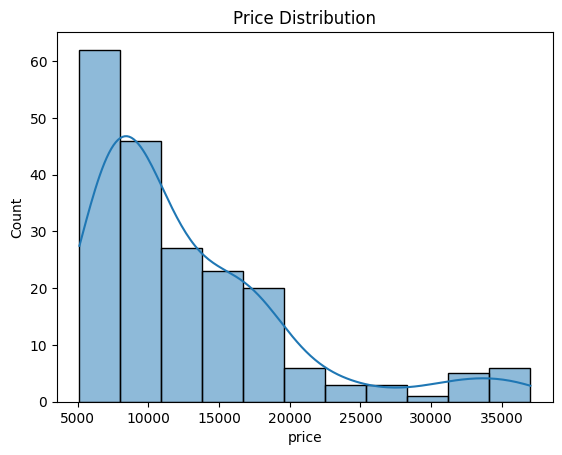

In [9]:
# Visualizations
sns.histplot(data['price'], kde=True)
plt.title("Price Distribution")
plt.show()

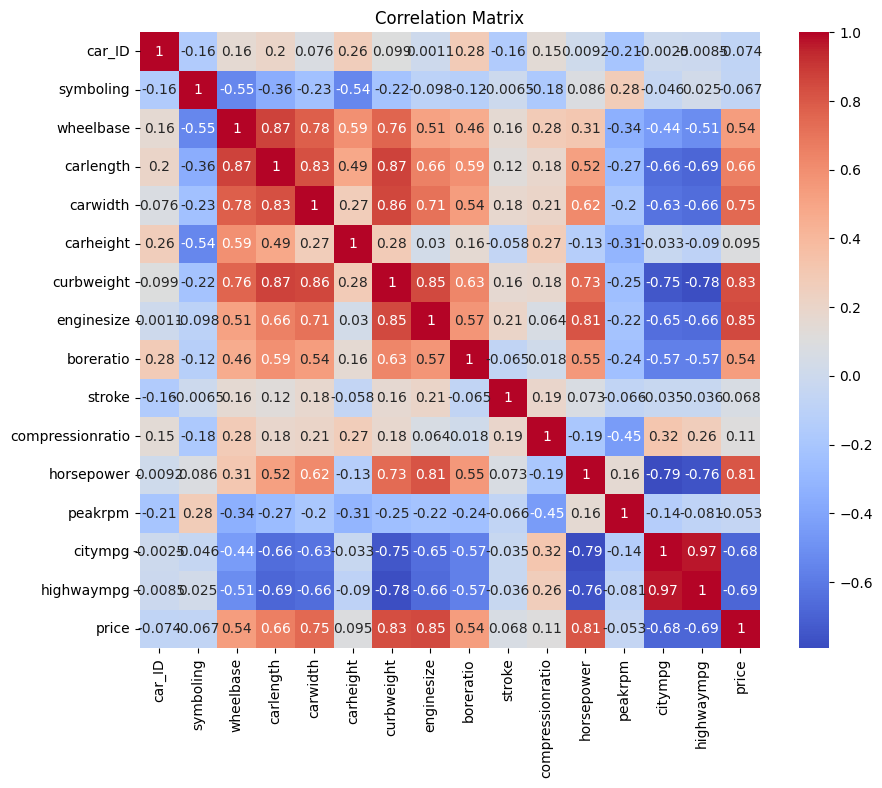

In [11]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

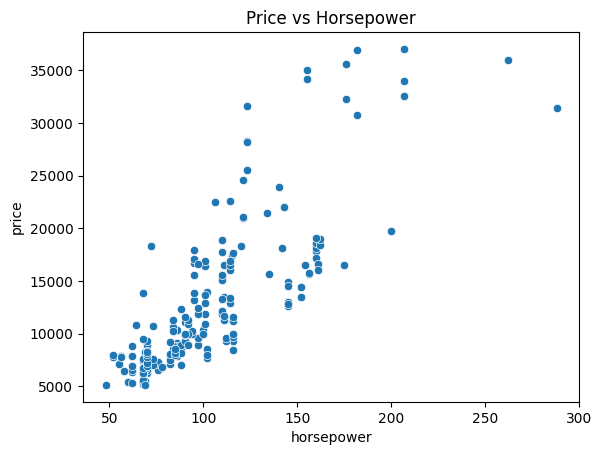

In [12]:
# Scatter plot of price vs. some numeric feature
sns.scatterplot(x='horsepower', y='price', data=data)
plt.title("Price vs Horsepower")
plt.show()

In [18]:
# Encoding categorical variables
data = pd.get_dummies(data, drop_first=True)

# Check for outliers in the target variable (Price)
from scipy.stats import zscore

data['z_score_price'] = zscore(data['price'])
data = data[data['z_score_price'].abs() <= 3]  # Keeping only rows within 3 std dev

# Drop the temporary z_score column
data.drop(columns=['z_score_price'], inplace=True)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Splitting data into features and target
X = data.drop(columns=['price'])
y = data['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = linear_model.predict(X_test)
print("Linear Regression:")
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("\nRidge Regression:")
print("R²:", r2_score(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", mean_squared_error(y_test, y_pred_ridge))

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print("\nLasso Regression:")
print("R²:", r2_score(y_test, y_pred_lasso))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("RMSE:", mean_squared_error(y_test, y_pred_lasso))


Linear Regression:
R²: -7.87957592620308
MAE: 9946.768061050312
RMSE: 156086924.50499734

Ridge Regression:
R²: 0.8375299111280632
MAE: 1297.772284888722
RMSE: 2855931.038467729

Lasso Regression:
R²: 0.6084088659967347
MAE: 1971.706405218318
RMSE: 6883465.638221074


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.533e+07, tolerance: 3.205e+05
  model = cd_fast.enet_coordinate_descent(


In [28]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe.fit(X_train, y_train)

# Selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['boreratio', 'CarName_alfa-romero Quadrifoglio', 'CarName_audi 4000',
       'CarName_audi 5000', 'CarName_bmw x1', 'CarName_bmw x3',
       'CarName_bmw z4', 'CarName_mazda rx-7 gs',
       'CarName_toyota corona liftback', 'enginetype_ohcf'],
      dtype='object')


In [29]:
# Coefficients for Linear Model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)


                              Feature   Coefficient
24                   CarName_bmw 320i  28023.461356
18                CarName_audi 100 ls  27816.827803
15   CarName_alfa-romero Quadrifoglio  24381.721569
25                     CarName_bmw x1  22019.174642
29                     CarName_bmw z4  21321.354358
..                                ...           ...
150   CarName_volkswagen super beetle -20171.487746
159                 CarName_vw dasher -23001.510173
132   CarName_toyota corolla liftback -24650.217352
142            CarName_toyouta tercel -27103.431669
148         CarName_volkswagen rabbit -32453.295799

[190 rows x 2 columns]
